In [1]:
import rasterio
from rasterio.plot import show
import osmnx as ox

src = rasterio.open("./data/inund5_utm.tif")
show(src)

RasterioIOError: ./data/inund5_utm.tif: No such file or directory

In [50]:
bbox = src.bounds
bbox

BoundingBox(left=133.3254475395833, bottom=33.38448626345729, right=133.70297191249546, top=33.59784287160146)

In [43]:
maprange = {
    'north': bbox.top, 'south': bbox.bottom,
    'east': bbox.right, 'west': bbox.left
}
print(maprange)

{'north': 33.59784287160146, 'south': 33.38448626345729, 'east': 133.70297191249546, 'west': 133.3254475395833}


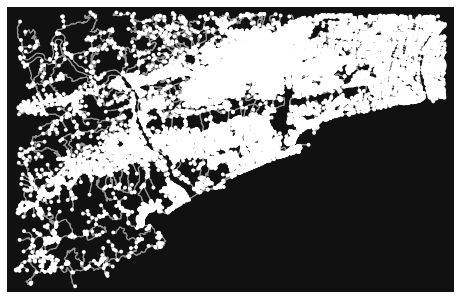

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [44]:
import pandas as pd
import geopandas as gpd
import osmnx as ox
import folium
import matplotlib.pyplot as plt
import seaborn as sns


# Obtain the roadmap data from OpenStreetMap by using OSMNX 
G = ox.graph_from_bbox(maprange['north'], maprange['south'], maprange['east'], maprange['west'], network_type='walk')
# G = ox.graph_from_bbox(33.5709710500001393, 33.5509710499999869, 133.5771409500001710, 133.4971409500001300, network_type='drive')
G_projected = ox.project_graph(G)
# Draw a map
ox.plot_graph(G_projected)


<AxesSubplot:>

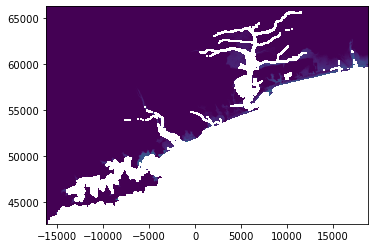

In [54]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
src_utm = rasterio.open("./data/inund5_utm.tif")
show(src_utm,ax=ax,cmap='viridis')

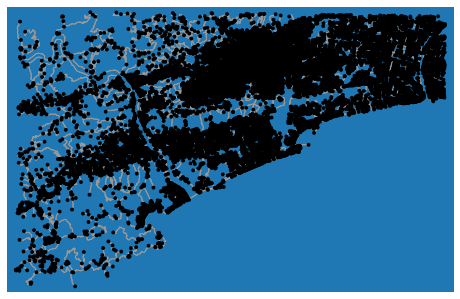

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [59]:
ox.plot_graph(G_projected,node_color='black',bgcolor=None)

In [60]:
type(src)

rasterio.io.DatasetReader

In [61]:
src_utm.crs

CRS.from_wkt('LOCAL_CS["JGD2000 / Japan Plane Rectangular CS IV",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","2446"]]')

In [62]:
ox.io.save_graph_shapefile(G_projected,'./data/kochi_graph_projected')

/opt/anaconda3/lib/python3.7/site-packages/osmnx/io.py:108: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)
